In [4]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv("D:\\placement (2).csv")
df.sample(5)

,cgpa,placement_exam_marks,placed
54,8.42,36.0,1
602,7.16,32.0,0
236,7.70,36.0,1
784,6.19,19.0,0
924,6.85,23.0,1


C:\Users\patel\AppData\Local\Temp\ipykernel_23476\403793784.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['cgpa'])
D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\patel\AppData\Local\Temp\ipykernel_23476\403793784.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (

<Axes: xlabel='placement_exam_marks', ylabel='Density'>

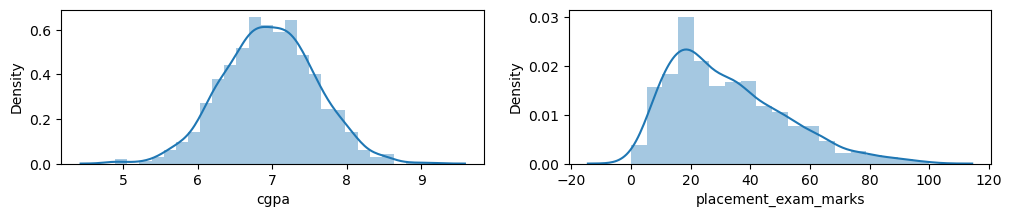

In [12]:
plt.figure(figsize=(12,2))
plt.subplot(121)
sns.distplot(df['cgpa'])

plt.subplot(122)
sns.distplot(df['placement_exam_marks'])

In [13]:
df.skew()

cgpa                   -0.014530
placement_exam_marks    0.835642
placed                  0.044077
dtype: float64

In [15]:
print("mean",df['cgpa'].mean())
print("std",df['cgpa'].std())
print("max",df['cgpa'].max())
print("min",df['cgpa'].min())

mean 6.96124
std 0.6158978751323894
max 9.12
min 4.89


In [16]:
#range

In [17]:
print("upper limit",df['cgpa'].mean() + 3*df['cgpa'].std())
print("lower limit",df['cgpa'].mean() - 3*df['cgpa'].std())

upper limit 8.808933625397168
lower limit 5.113546374602832


In [18]:
df [(df['cgpa']>8.80) | (df['cgpa']<5.11)]

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


In [20]:
# by removing rows
df1 = df[(df['cgpa']<8.80 )| (df['cgpa']>5.11)]
df1

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


In [21]:
#zscore 

In [27]:
df['cgpa_zscore'] = (df['cgpa'] - df['cgpa'].mean())/df['cgpa'].std()
df['cgpa_zscore']

0      0.371425
1      0.809810
2      0.939701
3     -0.878782
4      0.436371
         ...   
995    3.099150
996    3.505062
997   -3.362960
998    2.693239
999   -3.346724
Name: cgpa_zscore, Length: 1000, dtype: float64

In [28]:
df.head()

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371


In [29]:
df[df['cgpa_zscore']>3]

,cgpa,placement_exam_marks,placed,cgpa_zscore
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062


In [30]:
df[df['cgpa_zscore']<-3]

,cgpa,placement_exam_marks,placed,cgpa_zscore
485,4.92,44.0,1,-3.314251
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


In [37]:
df[(df['cgpa_zscore']>3) | (df['cgpa_zscore']<-3)]

,cgpa,placement_exam_marks,placed,cgpa_zscore
485,4.92,44.0,1,-3.314251
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


In [38]:
#trimming 

In [39]:
df2 = df[(df['cgpa_zscore']<3)&(df['cgpa_zscore']>-3)]

In [40]:
df2

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371
...,...,...,...,...
991,7.04,57.0,0,0.127878
992,6.26,12.0,0,-1.138565
993,6.73,21.0,1,-0.375452
994,6.48,63.0,0,-0.781363


In [41]:
#capping 


In [43]:
upper_l = df['cgpa'].mean() + 3*df['cgpa'].std()
upper_l

8.808933625397168

In [45]:
lower_l = df['cgpa'].mean() - 3*df['cgpa'].std()
lower_l

5.113546374602832

In [48]:
df['cgpa'] = np.where(
    df['cgpa']>upper_l,
    upper_l,
    np.where(
        df['cgpa']<lower_l,
        lower_l,
        df['cgpa']
    )
)

In [50]:
df.shape

(1000, 4)

In [52]:
df['cgpa'].describe()

count    1000.000000
mean        6.961499
std         0.612688
min         5.113546
25%         6.550000
50%         6.960000
75%         7.370000
max         8.808934
Name: cgpa, dtype: float64